# Phân tích Dữ liệu Khám phá (EDA) - Bệnh tiểu đường Pima Indians

## Bước 1: Khởi tạo và Tải dữ liệu


In [1]:
#Đầu tiên, chúng ta cần nạp các thư viện cần thiết cho việc phân tích và trực quan hóa dữ liệu. Bộ dữ liệu này không có tiêu đề cột, vì vậy chúng ta sẽ định nghĩa chúng theo tài liệu mô tả.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đặt tên cho các cột dựa trên mô tả của bộ dữ liệu
colnames = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age', 
    'Outcome'
]

# Tải dữ liệu từ file CSV
df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)

## Bước 2: Tìm hiểu và Khám phá dữ liệu ban đầu

### 2.1. Xem qua dữ liệu

In [2]:
# Hiển thị 5 dòng đầu tiên
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2. Thông tin tổng quan

In [3]:
# Xem thông tin tổng quan của DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### <b> Nhận xét:
<br>
-Bộ dữ liệu gồm 768 mẫu (dòng) và 9 đặc trưng (cột).<br>
-Tất cả các cột đều là kiểu dữ liệu số.<br>
-Không có giá trị null (thiếu) nào được Pandas phát hiện ở dạng None hay NaN.<br>


### 2.3. Thống kê mô tả

### <b> Sử dụng .describe() để xem các thông số thống kê cơ bản như trung bình, độ lệch chuẩn, giá trị nhỏ nhất, lớn nhất, v.v.

In [4]:
# Xem thống kê mô tả
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <b>Phát hiện quan trọng:<br>
-Quan sát dòng min, ta thấy các cột Glucose, BloodPressure, SkinThickness, Insulin, và BMI có giá trị tối thiểu là 0.<br>
-Trong thực tế y tế, các chỉ số này không thể bằng 0. Điều này cho thấy rằng các giá trị bị thiếu đã được mã hóa bằng số 0. Đây là một vấn đề nghiêm trọng cần được xử lý trong bước làm sạch dữ liệu.

## Bước 3: Làm sạch dữ liệu (Data Cleaning)

### <b> Dựa trên phát hiện ở trên, chúng ta cần xử lý các giá trị 0 không hợp lệ này. Chúng ta sẽ thay thế chúng bằng NaN (Not a Number) để Pandas hiểu rằng đó là dữ liệu bị thiếu, sau đó sẽ tiến hành điền các giá trị này.

### 3.1. Thay thế các giá trị 0 bằng NaN

In [6]:
# Các cột có giá trị 0 là không hợp lệ
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay thế 0 bằng NaN
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Kiểm tra lại số lượng giá trị thiếu
print("Số lượng giá trị thiếu sau khi thay thế 0:")
print(df.isnull().sum())

Số lượng giá trị thiếu sau khi thay thế 0:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 3.2. Điền các giá trị thiếu (Imputation)

In [8]:
# Điền các giá trị NaN bằng giá trị trung bình của cột tương ứng
df.fillna({
    'Glucose': df['Glucose'].mean(),
    'BloodPressure': df['BloodPressure'].mean(),
    'SkinThickness': df['SkinThickness'].mean(),
    'Insulin': df['Insulin'].mean(),
    'BMI': df['BMI'].mean()
}, inplace=True)

# Kiểm tra lại để chắc chắn không còn giá trị thiếu
print("\nSố lượng giá trị thiếu sau khi điền:")
print(df.isnull().sum())



Số lượng giá trị thiếu sau khi điền:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<b> Nhận xét: Dữ liệu đã được làm sạch và sẵn sàng cho các bước phân tích sâu hơn.

## Bước 4: Phân tích và Trực quan hóa dữ liệu

### 4.1. Phân bổ của biến mục tiêu (Outcome)

<b> Câu hỏi: Tỷ lệ người mắc bệnh và không mắc bệnh trong tập dữ liệu này là bao nhiêu?

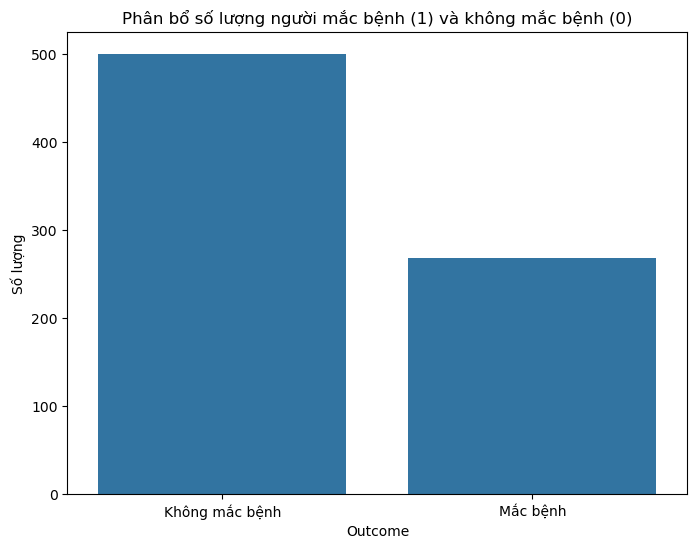

Tỷ lệ Outcome:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [10]:
# Vẽ biểu đồ đếm cho cột Outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Phân bổ số lượng người mắc bệnh (1) và không mắc bệnh (0)')
plt.xticks([0, 1], ['Không mắc bệnh', 'Mắc bệnh'])
plt.ylabel('Số lượng')
plt.show()

# In ra tỷ lệ phần trăm
print("Tỷ lệ Outcome:")
print(df['Outcome'].value_counts(normalize=True) * 100)

<b> Nhận xét: Khoảng 65% mẫu là người không mắc bệnh và 35% là người mắc bệnh. Dữ liệu có sự mất cân bằng nhẹ.

### 4.2. Phân tích phân phối của các đặc trưng

<b> Câu hỏi: Dữ liệu của các đặc trưng được phân phối như thế nào?

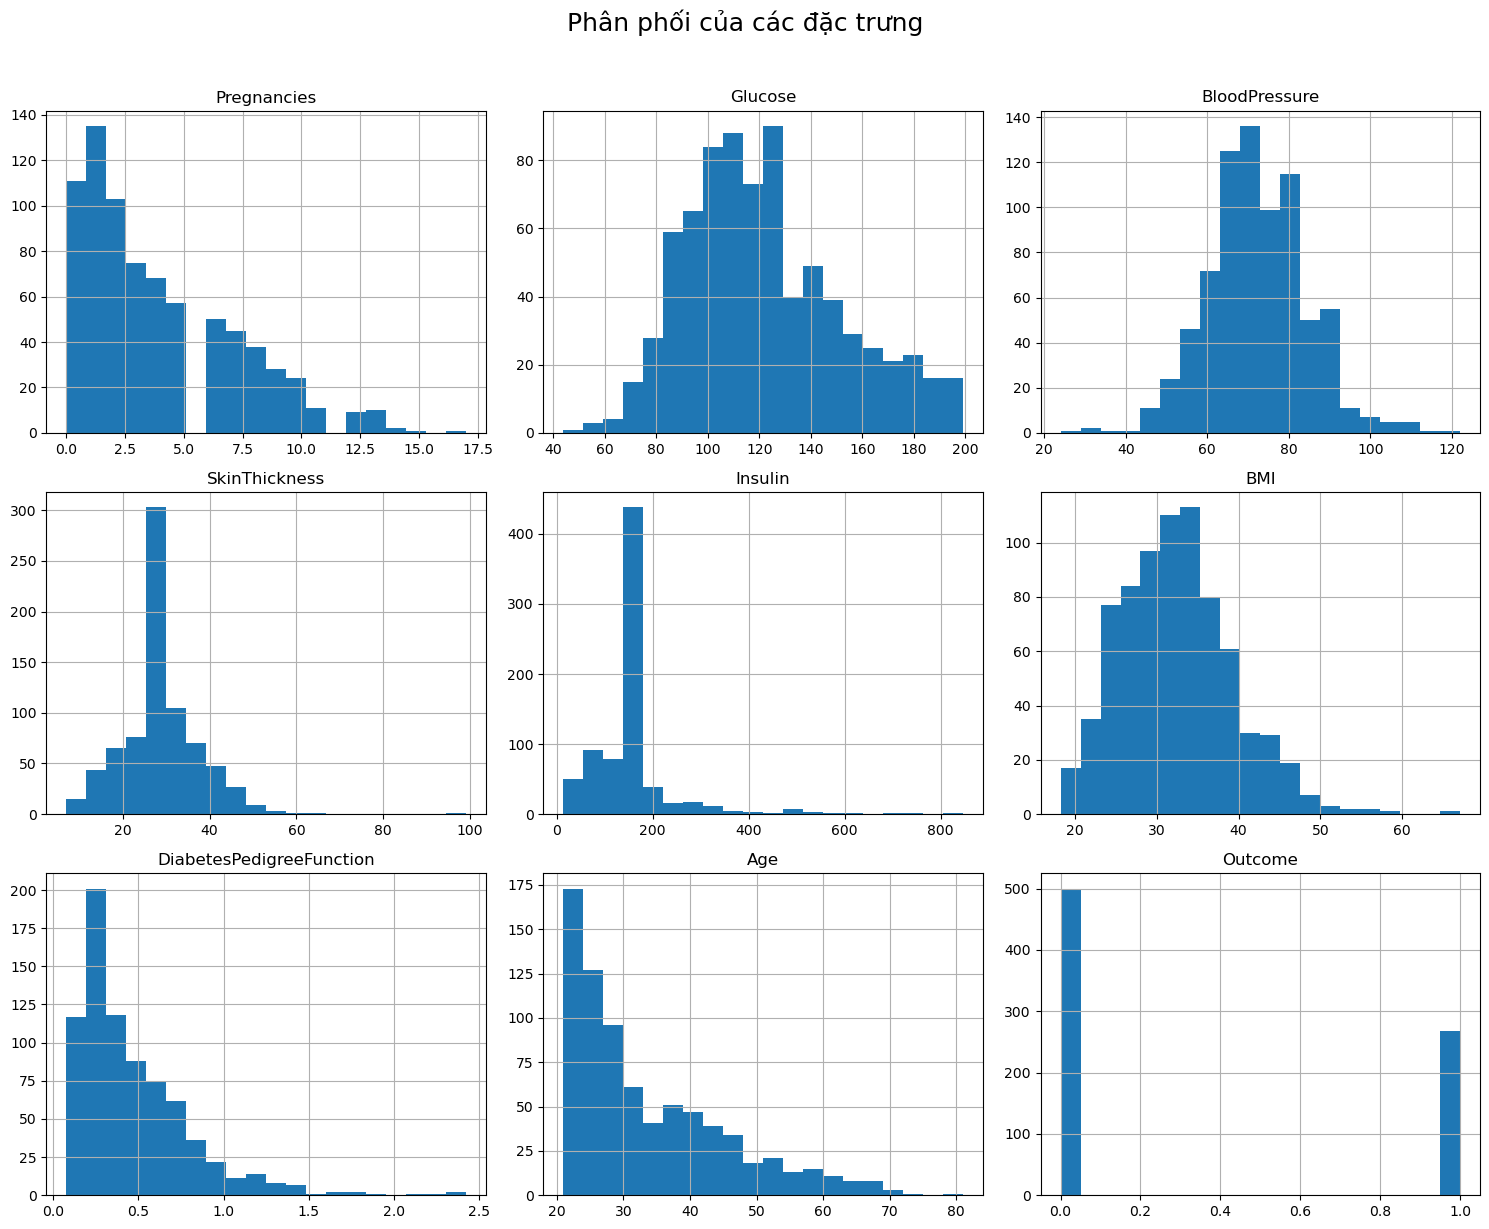

In [12]:
# Vẽ biểu đồ histogram cho tất cả các cột
df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Phân phối của các đặc trưng", y=1.02, size=18)
plt.tight_layout()
plt.show()

<b> Nhận xét:<br>
-Glucose, BloodPressure, BMI có dạng phân phối gần giống hình chuông (phân phối chuẩn).<br>
-Age, Pregnancies, DiabetesPedigreeFunction bị lệch phải rõ rệt, cho thấy đa số bệnh nhân là người trẻ và có ít lần mang thai.

### 4.3. Phân tích tương quan giữa các biến

<b> Câu hỏi: Các đặc trưng có mối liên hệ với nhau và với khả năng mắc bệnh không?

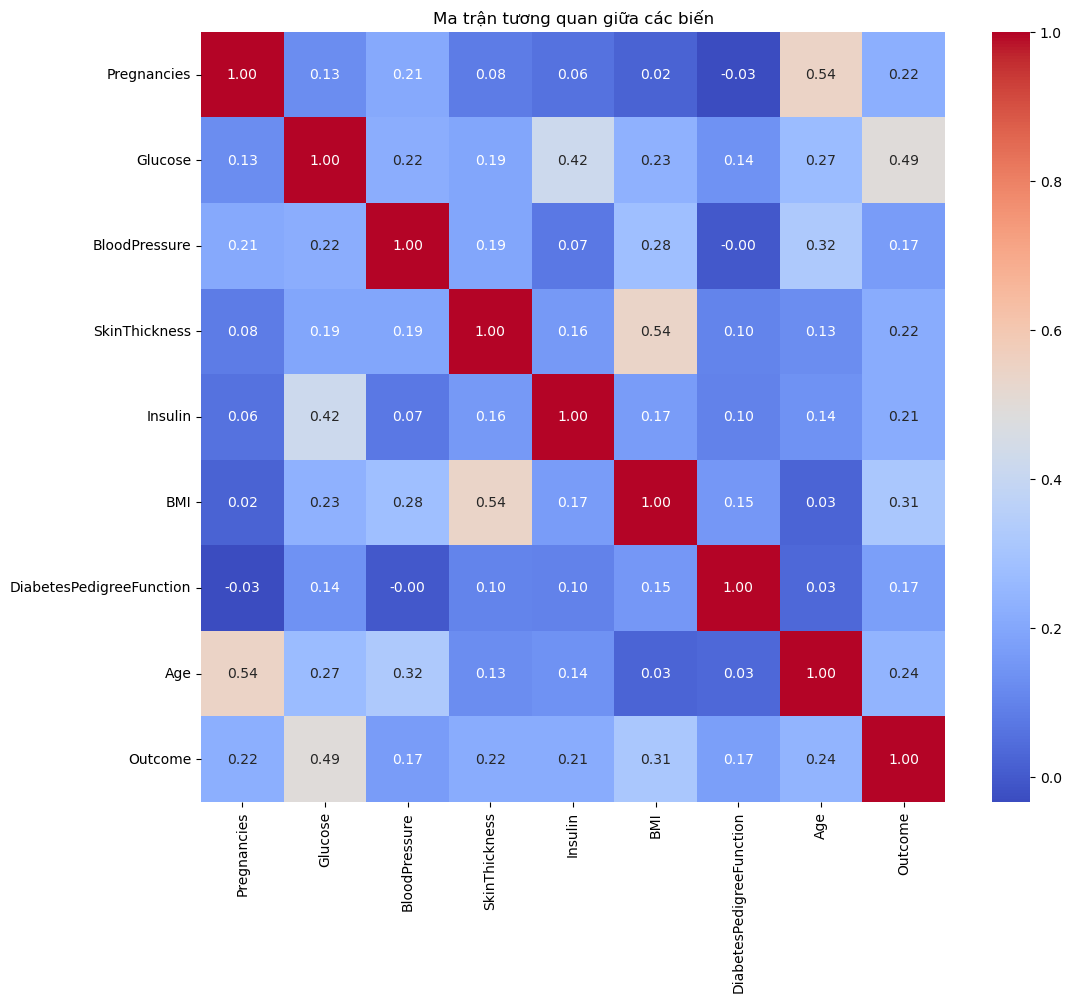

In [20]:
# Vẽ ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

<b> Nhận xét:<br>
Tương quan với Outcome: Glucose có độ tương quan dương cao nhất (0.49), là yếu tố dự báo mạnh nhất. Theo sau là BMI (0.31) và Age (0.24).<br>
Tương quan giữa các đặc trưng: Age và Pregnancies có tương quan dương mạnh (0.54), điều này hoàn toàn hợp lý.

### 4.4. So sánh các đặc trưng giữa nhóm bệnh và không bệnh

<b> Câu hỏi: Các chỉ số y tế khác nhau như thế nào giữa hai nhóm?

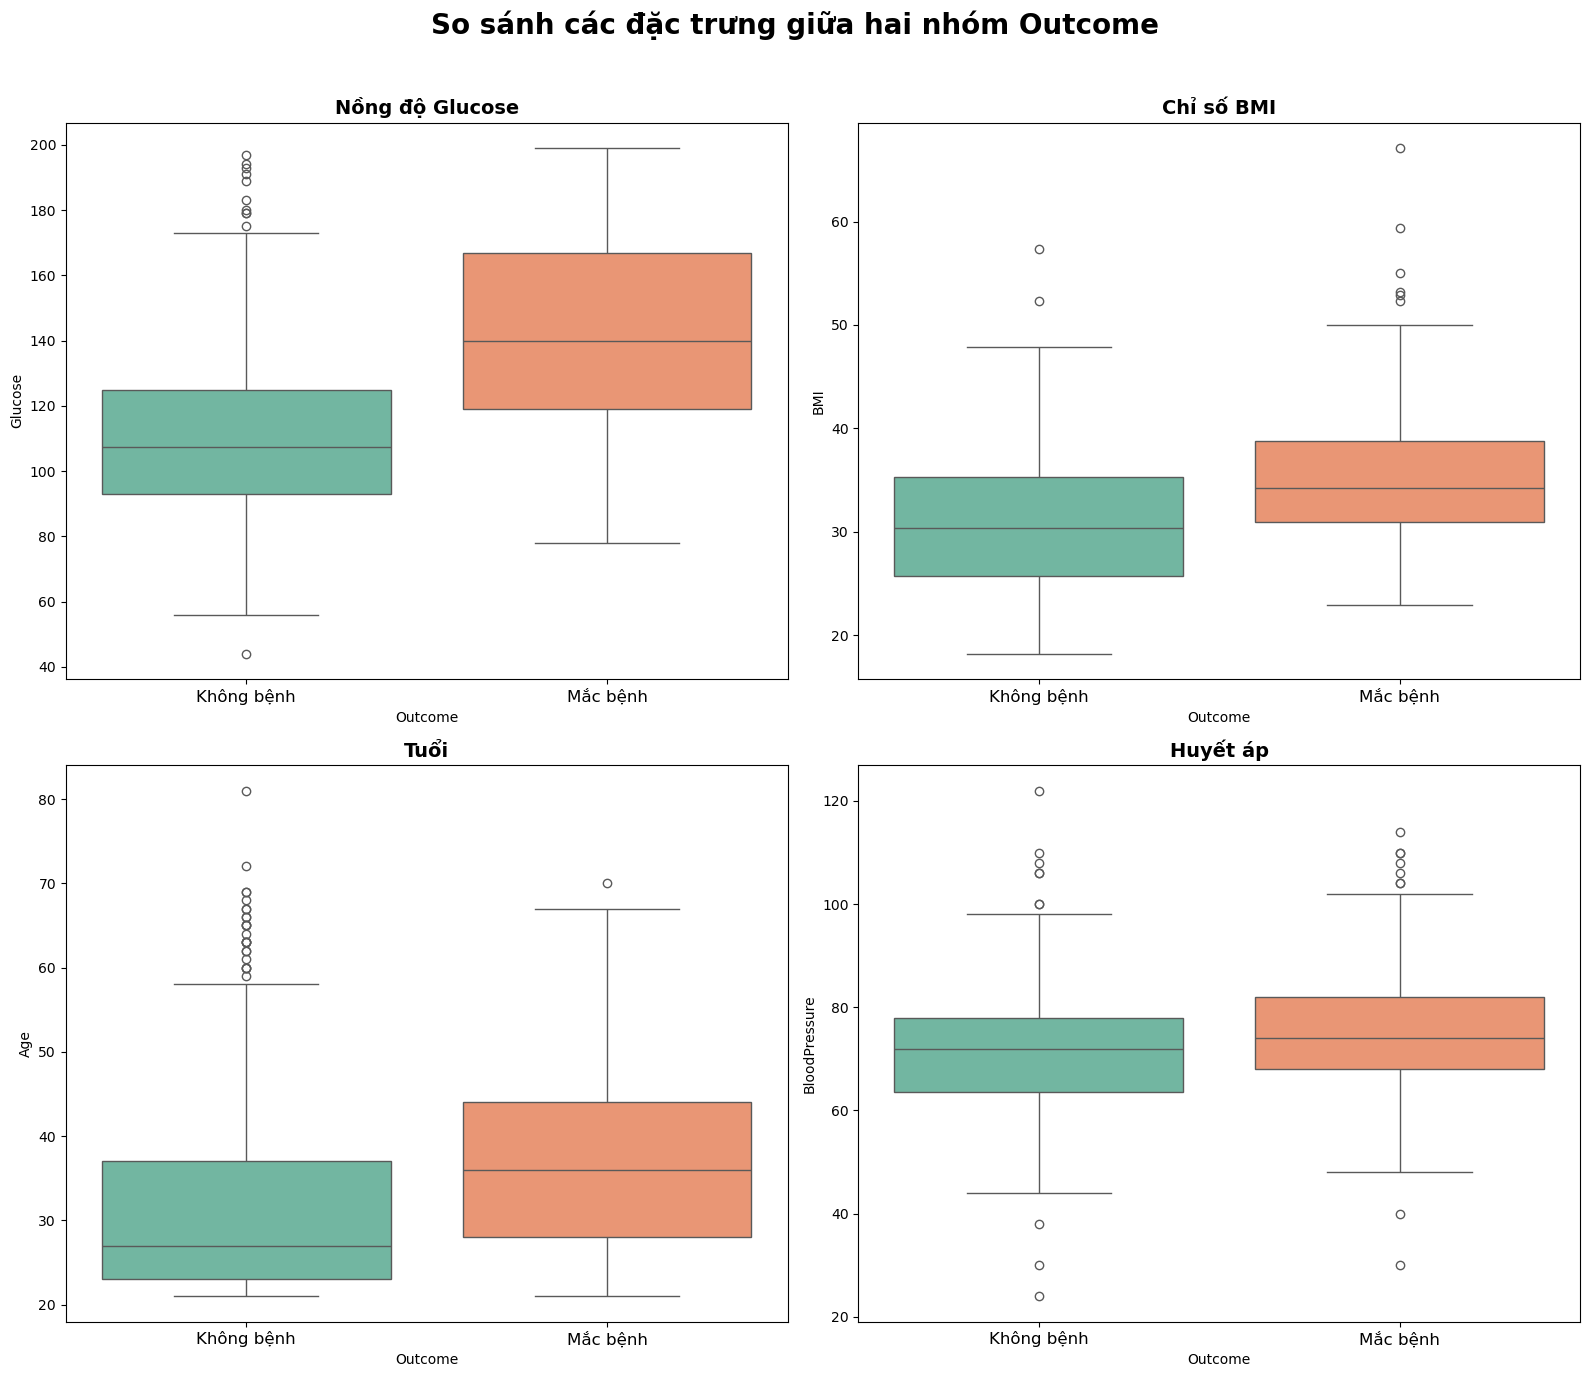

In [19]:
# So sánh phân phối các đặc trưng giữa hai nhóm Outcome
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('So sánh các đặc trưng giữa hai nhóm Outcome', fontsize=20, fontweight='bold')

features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
titles = ['Nồng độ Glucose', 'Chỉ số BMI', 'Tuổi', 'Huyết áp']

for ax, feature, title in zip(axes.flat, features, titles):
    sns.boxplot(ax=ax, x='Outcome', y=feature, data=df, hue='Outcome',
                palette="Set2", legend=False)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Không bệnh', 'Mắc bệnh'], fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
